In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
train = pd.read_csv('C:\\Users\\uphaa\\Documents\\datasets\\Titanictrain.csv')
test = pd.read_csv('C:\\Users\\uphaa\\Documents\\datasets\\Titanictest.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
train.info()
#age,cabin,embarked have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
test.info()
#age,cabin,fare has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [22]:
train.Age.mean()

29.69911764705882

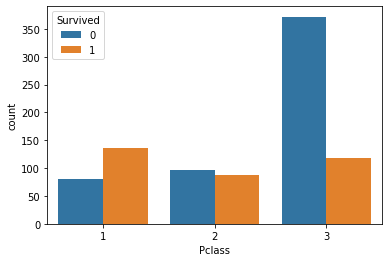

In [32]:
sns.countplot(train.Pclass,hue = train.Survived)
plt.show()
#ratio of pclass '3' survived least

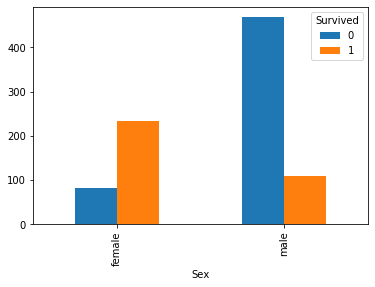

In [38]:
pd.crosstab(train.Sex, train.Survived).plot(kind = 'bar')
plt.show()
# males died more compared to females

C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


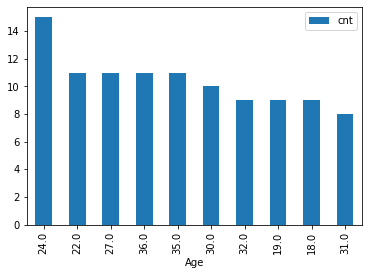

In [99]:
x = train.groupby('Age')['Survived'].agg({'cnt':'sum'}).reset_index().sort_values('cnt',ascending = False)
x.iloc[:10,].plot('Age','cnt',kind = 'bar')
plt.show()
#It seems 18-28 years died the most

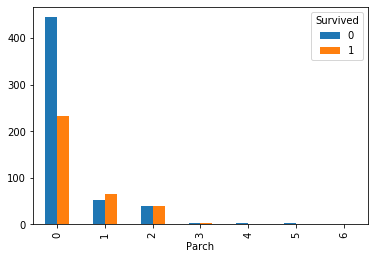

In [50]:
pd.crosstab(train.Parch,train.Survived).plot(kind = 'bar')
plt.show()
#It seems that people with no children travelling survived the most

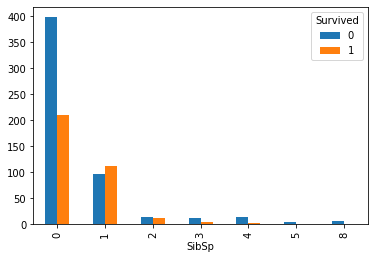

In [52]:
pd.crosstab(train.SibSp,train.Survived).plot(kind = 'bar')

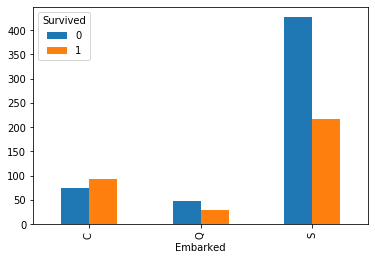

In [53]:
pd.crosstab(train.Embarked,train.Survived).plot(kind = 'bar')
plt.show()
#It seems that people embarked from S survived the most

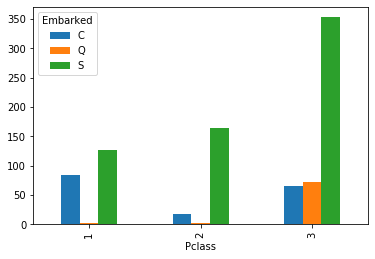

In [59]:
pd.crosstab(train.Pclass,train.Embarked).plot(kind = 'bar')

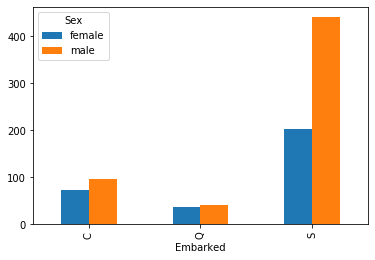

In [60]:
pd.crosstab(train.Embarked,train.Sex).plot(kind = 'bar')
plt.show()

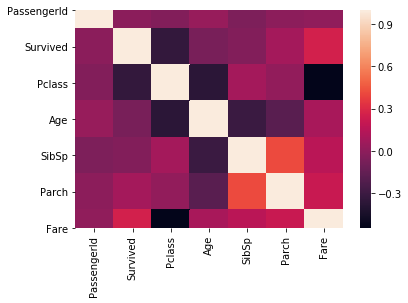

In [62]:
sns.heatmap(train.corr())

C:\Users\uphaa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\uphaa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


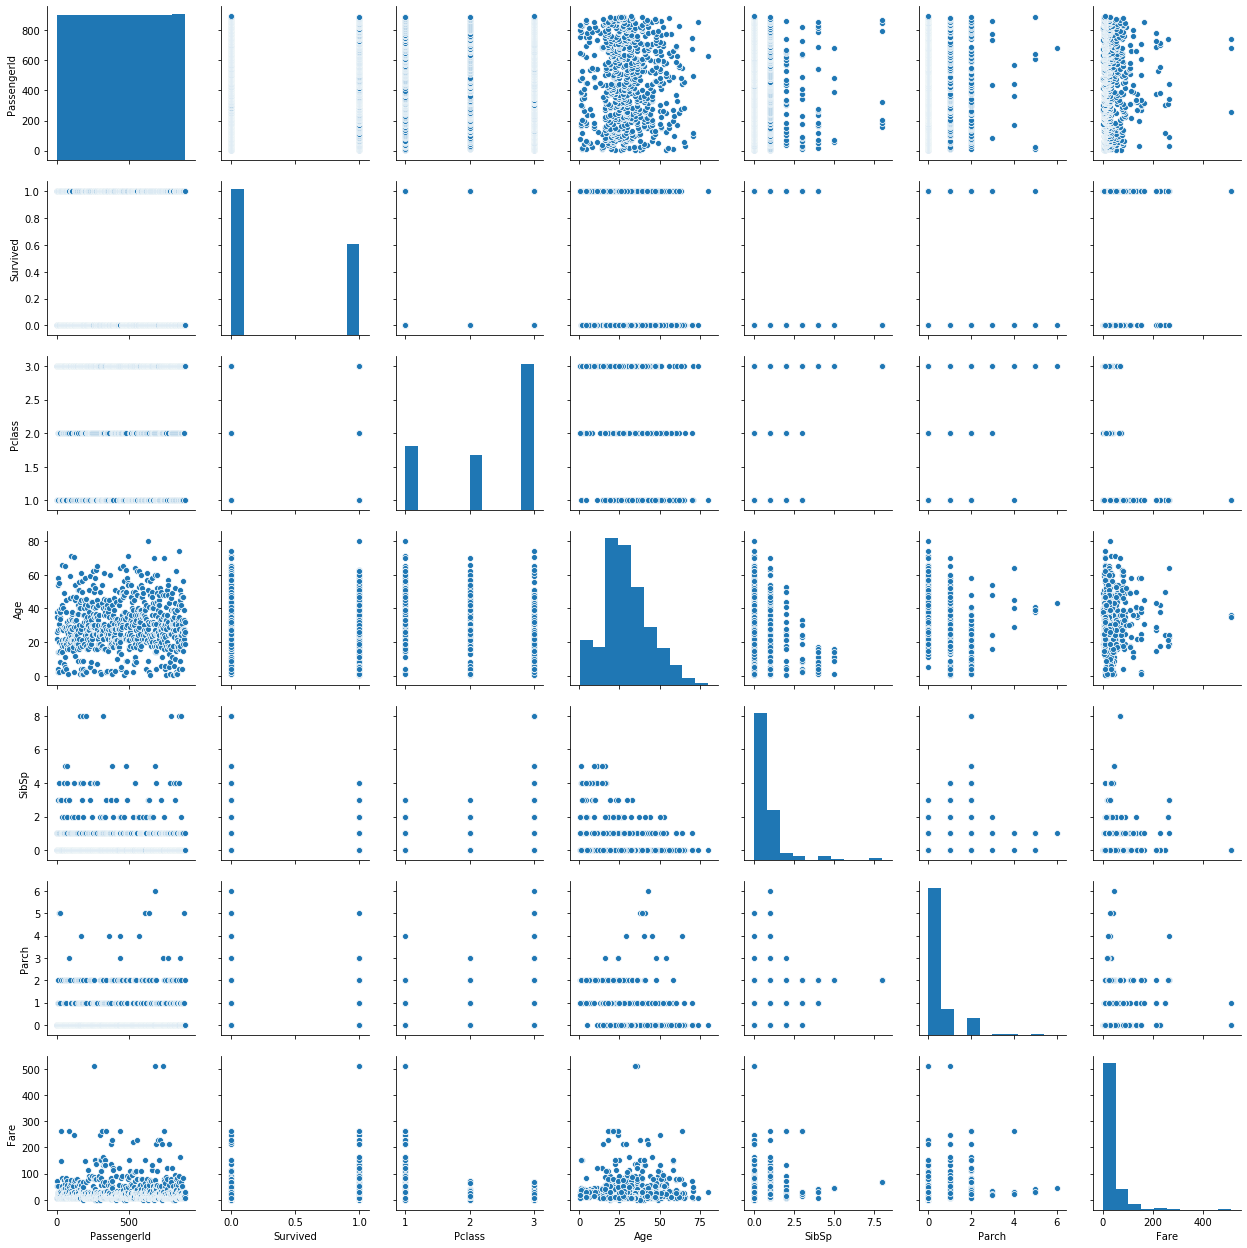

In [63]:
sns.pairplot(train)

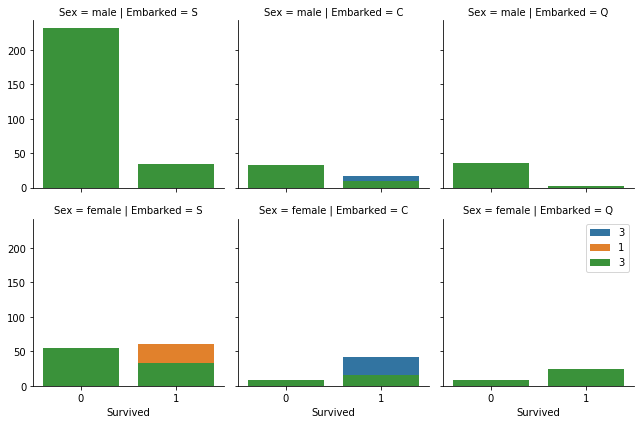

In [225]:
f = sns.FacetGrid(train,col= "Embarked",row = 'Sex',hue = "Pclass")
f.map(sns.countplot,"Survived")
plt.legend(train.Pclass)
plt.show()

In [217]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Salutation,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,Mr,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,Miss,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,W./C. 6607,23.4500,S,Miss,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,Mr,0


In [75]:
train[train.Embarked.isnull()]
train.Embarked.replace(np.nan,'S',inplace =True)

In [84]:
test.Fare.replace(np.nan,14,inplace =True)

In [86]:
train.drop('Cabin',axis = 1,inplace =True)

In [88]:
test.drop('Cabin',axis = 1,inplace =True)

In [101]:
x = train.groupby('Age')['Survived'].agg({'cnt':'sum'}).reset_index().sort_values('cnt')

C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [102]:
x.tail(n=15)

,Age,cnt
44,33.0,6
22,17.0,6
36,28.0,7
8,4.0,7
41,31.0,8
38,29.0,8
42,32.0,9
24,19.0,9
23,18.0,9
39,30.0,10


In [120]:
train.Name[0].split(',')[1].split('.')[0]

' Mr'

In [166]:
for x,y in train.iterrows():

    train.loc[x,'Salutation'] = train.loc[x,'Name'].split(',')[1].split('.')[0]

In [168]:
train.Salutation.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [173]:
ls = [' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer']
def title(x):
    if x in ls:
        if x in [' Master', ' Don', ' Rev', ' Dr', ' Mme',' Major',' Sir', ' Mlle', ' Col', ' Capt',' Jonkheer']:
            return " Mr"
        elif(x in [' Ms',' Lady']):
            return " Miss"
        else:
            return " Mrs"
    else:
        return x
    

In [176]:
train['Salutation'] = train.Salutation.apply(title)

In [187]:
train.Age[(train.Age == 0) & (train.Survived == 1) & (train.Salutation == ' Mr')] = 24
train.Age[(train.Age == 0) & (train.Survived == 0) & (train.Salutation == ' Mr')] = 40



C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [192]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [194]:
for x,y in test.iterrows():

    test.loc[x,'Salutation'] = test.loc[x,'Name'].split(',')[1].split('.')[0]
    
test['Salutation'] = test.Salutation.apply(title)

In [201]:
test.Age.replace(np.nan,30,inplace = True)

In [206]:
train['Family'] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']

In [208]:
train.drop(['SibSp','Parch'],axis = 1,inplace = True)

In [209]:
test.drop(['SibSp','Parch'],axis = 1,inplace = True)

In [214]:
test.Salutation[test.Salutation == ' Dona'] = ' Mrs'

C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### H0: Survival is independent of Pclass


In [227]:
dfn = pd.crosstab(train.Survived,train.Pclass)

In [230]:
stats.chi2_contingency(dfn)
#Since p value is too small, we reject null hypothesis
# Pvalue have significant role in Survival 

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909, 113.37373737, 302.53535354],
        [ 82.90909091,  70.62626263, 188.46464646]]))

In [231]:
dfn = pd.crosstab(train.Survived,train.Sex)

In [232]:
stats.chi2_contingency(dfn)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 355.52525253],
        [120.52525253, 221.47474747]]))

In [234]:
dfn = pd.crosstab(train.Survived,train.Salutation)
stats.chi2_contingency(dfn)

(255.85004919140113,
 2.7724755237117562e-56,
 2,
 array([[113.37373737, 357.98989899,  77.63636364],
        [ 70.62626263, 223.01010101,  48.36363636]]))

In [246]:
dfn = pd.crosstab(train.Survived,train.Name)
stats.chi2_contingency(dfn)

(891.0,
 0.484248151973633,
 890,
 array([[0.61616162, 0.61616162, 0.61616162, ..., 0.61616162, 0.61616162,
         0.61616162],
        [0.38383838, 0.38383838, 0.38383838, ..., 0.38383838, 0.38383838,
         0.38383838]]))

In [247]:
train.drop('Name',axis = 1 , inplace = True)
test.drop('Name',axis = 1 , inplace = True)

In [250]:
new_train = pd.get_dummies(train,columns = ['Salutation','Sex','Embarked'],drop_first = True)

In [251]:
new_train

,PassengerId,Survived,Pclass,Age,Ticket,Fare,Family,Salutation_ Mr,Salutation_ Mrs,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,A/5 21171,7.2500,1,1,0,1,0,1
1,2,1,1,38.0,PC 17599,71.2833,1,0,1,0,0,0
2,3,1,3,26.0,STON/O2. 3101282,7.9250,0,0,0,0,0,1
3,4,1,1,35.0,113803,53.1000,1,0,1,0,0,1
4,5,0,3,35.0,373450,8.0500,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,211536,13.0000,0,1,0,1,0,1
887,888,1,1,19.0,112053,30.0000,0,0,0,0,0,1
888,889,0,3,0.0,W./C. 6607,23.4500,3,0,0,0,0,1
889,890,1,1,26.0,111369,30.0000,0,1,0,1,0,0


In [256]:
new_train.drop('Ticket',axis = 1,inplace = True)


In [255]:
new_train

,PassengerId,Survived,Pclass,Age,Fare,Family,Salutation_ Mr,Salutation_ Mrs,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,1,1,0,1,0,1
1,2,1,1,38.0,71.2833,1,0,1,0,0,0
2,3,1,3,26.0,7.9250,0,0,0,0,0,1
3,4,1,1,35.0,53.1000,1,0,1,0,0,1
4,5,0,3,35.0,8.0500,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,13.0000,0,1,0,1,0,1
887,888,1,1,19.0,30.0000,0,0,0,0,0,1
888,889,0,3,0.0,23.4500,3,0,0,0,0,1
889,890,1,1,26.0,30.0000,0,1,0,1,0,0


In [237]:
from sklearn.model_selection import train_test_split

In [257]:
X = new_train.drop('Survived',axis = 1)
y = new_train.Survived
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 123,test_size = 0.20,stratify = y)

In [242]:
from sklearn.linear_model import LogisticRegression

In [296]:
lr = LogisticRegression(C= 1)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8100558659217877

In [265]:
lr.score(X_test,y_test)

0.8100558659217877

In [266]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [268]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[97 13]
 [21 48]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



In [269]:
accuracy_score(y_test,y_pred)

0.8100558659217877

In [270]:
from sklearn.neighbors import KNeighborsClassifier

In [283]:
knn = KNeighborsClassifier(n_neighbors= 55)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [284]:
accuracy_score(y_test,y_pred)

0.6927374301675978

In [286]:
lis = [1,5,10,15,30,50,55]
sto = []
for x in lis:
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    sto.append(accuracy_score(y_test,y_pred))    
    

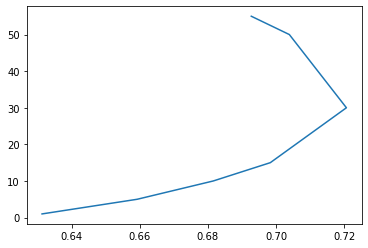

In [289]:
plt.plot(sto,lis)

In [290]:
from sklearn.tree import DecisionTreeClassifier

In [295]:
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train,y_train)
dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.6927374301675978

In [297]:
from sklearn.ensemble import VotingClassifier

In [299]:
est = [('logistic',lr),('neigh',knn),('Dec',dt)]
vc = VotingClassifier(estimators = est)
vc.fit(X_train,y_train)
y_pred = vc.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7988826815642458

In [301]:
from sklearn.ensemble import BaggingClassifier

In [304]:
dt1 = DecisionTreeClassifier(max_depth =6,min_samples_leaf=3)

In [307]:
bc = BaggingClassifier(base_estimator=dt1,n_estimators=500)
bc.fit(X_train,y_train)
y_pred = bc.predict(X_test)

In [308]:
accuracy_score(y_test,y_pred)

0.8324022346368715

In [309]:
from sklearn.ensemble import RandomForestClassifier 

In [351]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8156424581005587

In [314]:
rf.feature_importances_

array([0.17930664, 0.08317783, 0.19552162, 0.17019734, 0.06435458,
       0.1575963 , 0.05397013, 0.06610642, 0.00865844, 0.02111071])

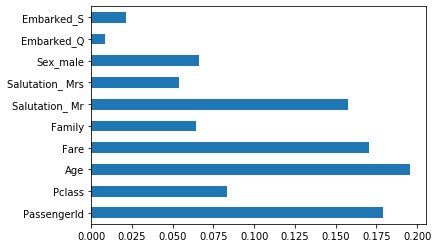

In [315]:
imp = pd.Series(rf.feature_importances_,index = X_train.columns)
imp.plot(kind = 'barh')

In [316]:
from sklearn.ensemble import AdaBoostClassifier

In [321]:
dt2 = DecisionTreeClassifier(max_depth = 1)
adb = AdaBoostClassifier(base_estimator = dt2,n_estimators = 100)
adb.fit(X_train,y_train)
y_pred = adb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8100558659217877

In [322]:
from sklearn.ensemble import GradientBoostingClassifier

In [326]:
gdb = GradientBoostingClassifier(max_depth=4,n_estimators=100)
gdb.fit(X_train,y_train)
y_pred = gdb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8156424581005587

In [327]:
from xgboost import XGBClassifier

In [352]:
xg = XGBClassifier(objective = 'binary:logistic',n_estimators = 50)
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
accuracy_score(y_test,y_pred)

0.8491620111731844

Xgboost: 84.9

Random Forest: 81

Gradient Boost: 81.5

Logistic: 81

Adaboost: 81

Voting Classifier: 79.8

KNN: 69

Decision Tree: 69

In [369]:
newtest1 = test.drop('Ticket',axis = 1)

In [370]:
newtest = pd.get_dummies(newtest1,columns = ['Salutation','Sex','Embarked'],drop_first= True)

In [361]:
latest_X_train = pd.concat([X_train,X_test])
latest_y_train = pd.concat([y_train,y_test])

In [363]:
xg.fit(latest_X_train,latest_y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [371]:
pred_main = xg.predict(newtest)

In [376]:
submit = pd.DataFrame({'PassengerId':ID,'Survived':pred_main})

In [379]:
submit.to_csv('titanic_model.csv',index = False)

In [392]:
l = [1,2,4,5,11,22,30,34,36,45,50]
l1 = pd.cut(l,bins = 5)

In [415]:
new_train.Age.replace(0,27,inplace = True)

## Submission 2

In [421]:
X_train = new_train.drop('Survived',axis = 1)
y_train = new_train.Survived

In [422]:
X_test = newtest.copy()

In [423]:
xg = XGBClassifier(objective = 'binary:logistic',n_estimators = 50)
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)

In [425]:
submit2 = pd.DataFrame({'PassengerId':ID,'Survived':y_pred}) 
submit2.to_csv('titanic_model2.csv',index = False)

## Submission 3

In [431]:
new_train.drop('PassengerId',axis = 1,inplace =True)

In [432]:
newtest.drop('PassengerId',axis = 1,inplace =True)

In [434]:
from sklearn.preprocessing import StandardScaler

In [435]:
scaler = StandardScaler()


In [448]:
#df_scaled = pd.DataFrame(scaler.fit_transform(new_train),columns = new_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(newtest),columns = newtest.columns)

In [446]:
df_scaled.drop('Survived',axis = 1,inplace = True)

In [453]:
y_train = new_train.Survived

In [454]:
xg = XGBClassifier(objective = 'binary:logistic',n_estimators = 50)
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)

In [456]:
submit3 = pd.DataFrame({'PassengerId':ID,'Survived':y_pred}) 
submit3.to_csv('titanic_model3.csv',index = False)